> p-value의 기준
>- `P-value < 0.01` : 귀무가설이 옳을 확률이 `0.01` 이하 → 틀렸다(깐깐한 기준) --> 대립가설 채택(귀무가설 기각)
>- `P-value < 0.05` : 귀무가설이 옳을 확률이 `0.05` 이하 → 틀렸다(일반적인 기준) --> 대립가설 채택(귀무가설 기각)
>- `0.05 < P-value < 0.1` : 애매한 경우(샘플링을 다시한다)
>- `0.1 < P-value` : 귀무가설이 옳을 확률이 0.1 이상 → 틀리지 않았다(맞다와 다름), 대립가설 기각

# 작업준비

## 패키지 참조

In [1]:
import numpy as np
from pandas import read_excel
from scipy import stats

import sys
import seaborn as sb
from matplotlib import pyplot as plt

## 그래프 초기화

In [2]:
plt.rcParams['font.family'] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['axes.unicode_minus']=False

# #문제1

홈런수와 평균타율이 상관관계가 있는지 그 관련성을 분석하라.

| 가설 | 내용 |
| -- | -- |
| 귀무가설 | `홈런수`와 `평균타율`은 서로 상관관계가 없다. |
| 대립가설 | `홈런수`와 `평균타율`은 서로 상관관계가 있다. |

## 데이터 가져오기

In [3]:
df = read_excel("https://data.hossam.kr/E03/baseball.xlsx")
df

,홈런수,평균타율
0,174,0.277
1,163,0.276
2,161,0.272
3,230,0.272
4,214,0.269
5,194,0.266
6,187,0.263
7,167,0.262
8,190,0.262
9,196,0.261


## 산점도 그래프 확인

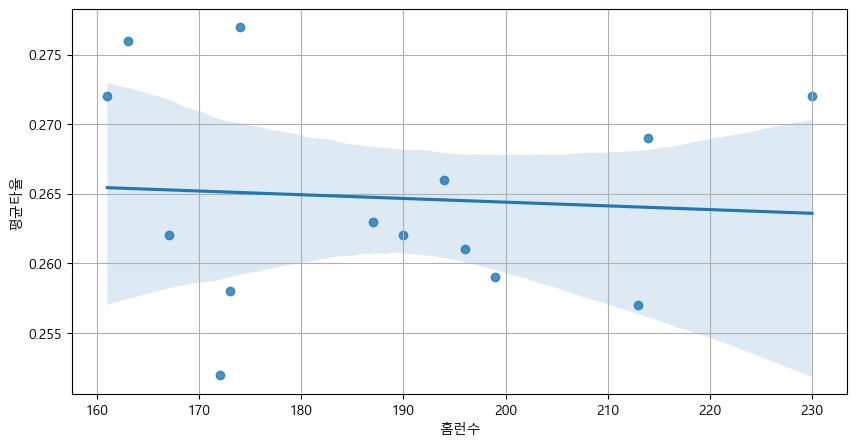

In [4]:
sb.regplot(data=df,x='홈런수',y='평균타율')
plt.grid()
plt.show()
plt.close()

## 상관계수 확인

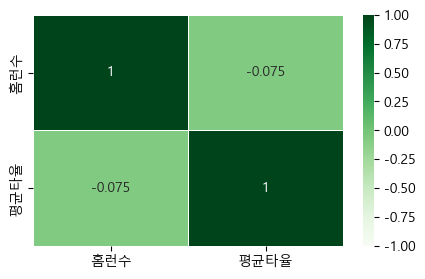

In [5]:
plt.rcParams["figure.figsize"] = (5,3)
sb.heatmap(df.corr(method='pearson'), annot = True, cmap = 'Greens', vmin = -1, vmax=1, linewidths=.5)
plt.show()
plt.close()

## 상관분석 결과 검정

In [6]:
stats.pearsonr(df['홈런수'], df['평균타율'])

PearsonRResult(statistic=-0.07469493488185412, pvalue=0.7996661879546072)

### 결과 해석

결과의 `상관계수`의 값이 약 `-0.075`, `p-value(유의수준)`값이 약 `0.8`로 0.05보다 크기 때문에 `대립가설을 기각`하고 `귀무가설을 유지`한다. 그러므로 홈런수와 평균타율은 서로 상관이 없다고 볼 수 있다.

# 문제2

어떤 원료의 품질특성($x$)과 이 원료를 사용하여 만든 제품의 품질특성($y$)에 관한 조사를 한 결과 다음 데이터를 얻었다.

이들 간 상관관계를 구하고 상관 유무 검정을 유의수준 5%에서 실시하라.

| 가설 | 내용 |
| -- | -- |
| 귀무가설 | `원료의 품질특성`과 `제품의 품질특성`은 서로 상관관계가 없다. |
| 대립가설 | `원료의 품질특성`과 `제품의 품질특성`은 서로 상관관계가 있다. |

## 데이터 가져오기

In [8]:
df = read_excel("https://data.hossam.kr/E03/product.xlsx")
df

,x,y
0,36,29
1,40,32
2,34,29
3,44,40
4,33,31
5,36,29
6,40,34
7,33,30
8,26,25
9,36,31


## 산점도 그래프 시각화

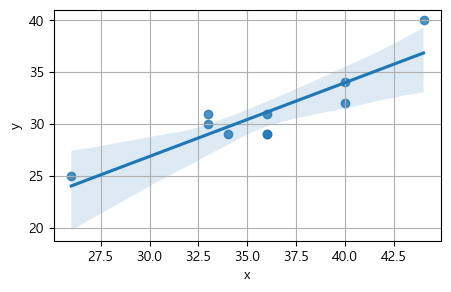

In [9]:
sb.regplot(data=df, x='x', y='y')
plt.grid()
plt.show()
plt.close()

## 상관계수 확인

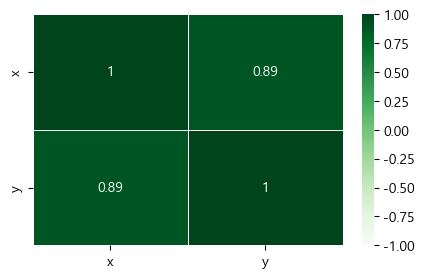

In [10]:
sb.heatmap(df.corr(method='pearson'), annot = True, cmap = 'Greens', vmin = -1, vmax=1, linewidths=.5)
plt.show()
plt.close()

## 상관분석 결과 검정

In [11]:
stats.pearsonr(df['x'], df['y'])

PearsonRResult(statistic=0.8880516689960796, pvalue=0.0005990724739320328)

### 결과 해석

결과의 `상관계수`의 값이 약 `0.888`, `p-value(유의수준)`값이 약 `0.0006`로 0.05보다 작기 때문에 `귀무가설을 기각`하고 `대립가설을 채택`한다. 그러므로 `원료의 품질특성`과 `제품의 품질특성`은 서로 관계가 있다.

# 문제3

10명의 학생들에 대한 공부 시간과 성적 데이터를 분석하라.

| 가설 | 내용 |
| -- | -- |
| 귀무가설 | `공부시간`과 `성적`은 서로 관계가 없다. |
| 대립가설 | `공부시간`과 `성적`은 서로 관계가 있다. |

## 데이터

In [12]:
df = read_excel("https://data.hossam.kr/E03/study_time.xlsx")
df

,공부시간,성적
0,2,65
1,4,85
2,3,75
3,5,90
4,6,95
5,7,70
6,8,80
7,9,85
8,10,100
9,1,60


## 산점도 그래프 시각화

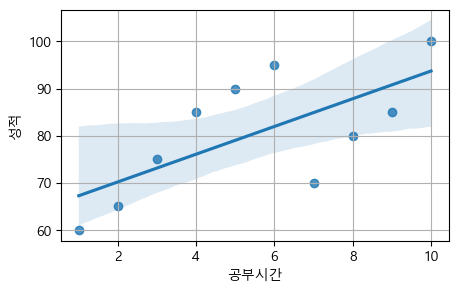

In [13]:
sb.regplot(data=df, x='공부시간', y='성적')
plt.grid()
plt.show()
plt.close()

## 상관계수 확인

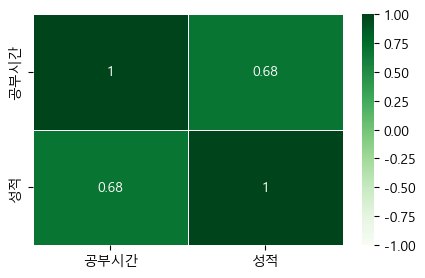

In [14]:
sb.heatmap(df.corr(method='pearson'), annot = True, cmap = 'Greens', vmin = -1, vmax=1, linewidths=.5)
plt.show()
plt.close()

## 상관분석 결과 검정

In [15]:
stats.pearsonr(df['공부시간'], df['성적'])

PearsonRResult(statistic=0.6842363116996173, pvalue=0.029083749057619408)

### 결과보고

10명의 학생을 대상으로 공부시간에 따른 성적을 조사한 결과 공부시간과 성적의 상관계수($r$)는 약 `0.684`로 `양의 상관관계`를 갖는 것으로 타나났다. `p-value(유의수준)`값이 약 `0.029`로 유의수준 0.05보다 작으므로 이는 통계적으로 유의하다. 결론적으로 학생의 공부시간과 성적은 양의 관계가 있다고 볼 수 있다.